# Numerical Solutions to Partial Differential Equations

### Simple 3-d Heat Equation
$$
\nabla^2 \cdot u(x,y,z,t) = \frac{c \rho}{k} u_t
$$
### Elliptic Equations
Poisson Equation:
$$
u_{xx}(x,y) + u_{yy}(x,y) = f(x,y)
$$
Laplace's Equation:
$$
u_{xx}(x,y) + u_{yy}(x,y) = 0
$$
- If temperature within the region is determined by the temperature distribution on the boundary of the region, the constraints are called **Dirichlet boundary conditions** given by:
$$
u(x,y) = g(x,y)
$$
### Parabolic Equations
$$
u_t(x,y) - \alpha^2 u_{xx}(x,y) = 0
$$
- important in study of gas diffusion, also known as diffusion equation

### Hyperbolic Equations
- one-dimension wave equation is an exaqmple of a hyperbolic PDE
$$
\alpha^2 u_{xx}(x,t) - u_{tt}(x,t) =0
$$

### 12.1 Elliptic PDE
$$
\nabla^2 u(x,y) \equiv u_{xx}(x,y) + u_{yy}(x,y) = f(x,y)
$$
on $R = \{ (x,y) | a < x< b , c< y < d \}$ with $u(x,y) = g(x,y) \text{ for } (x,y) \in S$, where $S$ denotes the boundary of $R$. If $f$ and $g$ are continious on their domains, then there is a unique solution to this equation.


- method used is a 2-d adaption of the finite difference method for linear BVP.
First step is to choose integers $n$ and $m$ to define step sizes $h=(b-a)/n$ , $k=(d-c)/m$. Partition the interval $[a,b]$ into $n$ equal parts with width $h$ and interval $[c,d]$ into $m$ equal parts of width $k$.

- $x_i = a+ih$, $y_j = c+jk$

Using Taylor series in the variable $x$ about $x_i$, we can generate the centered-difference formula:
$$
u_{xx}(x_i,y_j) = \frac{1}{h^2} u(x_{i+1},y_j) - 2u(x_i,y_j)+u(x_{u-1},y_j) -\frac{h^2}{12}\frac{\partial^4 u}{\partial x^4}(\xi_i, y_j)
$$
and Taylor series in the variable $y$ about $y_j$ to generate:
$$
u_{xx}(x_i,y_j) = \frac{1}{k^2} u(x_{i},y_{j+1}) - 2u(x_i,y_j)+u(x_{u},y_{j-1}) -\frac{k^2}{12}\frac{\partial^4 u}{\partial y^4}(x_i, \eta_j)
$$
Poissons Eq at the points $(x_i,y_j)$ :

$$
\frac{1}{h^2} u(x_{i+1},y_j) - 2u(x_i,y_j)+u(x_{u-1},y_j) +\frac{1}{k^2} u(x_{i},y_{j+1}) - 2u(x_i,y_j)+u(x_{u},y_{j-1}) \\
= f(x_i,y_j) + \frac{k^2}{12}\frac{\partial^4 u}{\partial y^4}(x_i, \eta_j) + \frac{h^2}{12}\frac{\partial^4 u}{\partial x^4}(\xi_i, y_j)
$$
for each $i \in [1,n-1] \text{ and } j \in [1,m-1]$. The Boundary conditions are:
$$
u(x_0, y_j) = g(x_0, y_j) \text{ and } u(x_n, y_j) = g(x_n, y_j), \text{ for each } j \in [0,m] \\
u(x_i, y_0) = g(x_i, y_0) \text{ and } u(x_i, y_m) = g(x_i, y_m), \text{ for each } i \in [1,n-1]
$$

### Finite-Difference Method
$$
2  \left[\left(\frac{h}{k}\right)^2+1\right] w_{ij} -(w_{i+1,j}+w_{i-1,j}) - \left(\frac{h}{k}\right)^2(w_{i,j+1}+w_{i,j-1}) = -h^2f(x_i,y_j)
$$
for each $i\in[1,n-1] \text{ and } j \in [1,m-1]$ and

$$
w_{0,j} = g(x_0, y_j) \text{ and } w_{n,j} = g(x_n, y_j), \text{ for each } j \in [0,m] \\
w{i,0} = g(x_i, y_0) \text{ and } w{i,m} = g(x_i, y_m), \text{ for each } i \in [1,n-1]
$$

- This produces an $(n-1)(m-1) \times (n-1)(m-1)$ linear system with the unknowns being the approximations $w_{i,j}$ to $u(x_i,y_j)$ at the interior mesh points
- linear system is expressed for matrix calculations more efficiently if a relabeling of the interior mesh points is introduced:
$$
P_l = (x_i,y_j) \quad \text{ and } \quad w_l = w_i,j
$$
where $l=i+(m-1-j)(n-1), i,j\forall [1,n-1],[1,m-1]$

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def PoissionFD(f,g,a,b,c,d,m,n,TOL,N):
    h=(b-a)/n
    k=(d-c)/m
    tx=np.arange(a,b+h,h)
    ty=np.arange(c,d+k,k)
    lam=h**2/k**2
    mu = 2*(1+lam)
    l = 1

    w = np.zeros(n,m)

    while l <= N: #Gauss-Seidel Iterations
        z = (-h**2 * f(tx[0],ty[m-1]) + g(a,ty[m-1]) + lam * g(tx[0],d) + lam* w[0,m-2] + w[1,m-1])/mu
        norm = np.abs(z-w[0,m-1])
        w[0,m-1] = z
        for i in range(1,n-3):
            z = (-h**2 * f(tx[i],y[m-1]) + lam*g[tx[i],d] + w[i-2,m-1] + w[i,m-1] + lam * w[i-1,m-2])/mu
            if np.abs(w[i-1,m-1] - z) > norm:
                norm = np.abs(w[i-1,m-1] - z)
            w[i-1,m-1] = z
            for j in range[m-2,2]: #wtf
                z = (-h**2*f(tx[0], ty[j]) + g[a,ty[j]] + lam*(w[0,j+1] + w[0,j-1]) + w[1,j] )/mu
                if np.abs(w[0,j] - z) > norm:
                    norm = np.abs(w[0,j] - z)
                w[0,j] = z
            for i in range(1,n-3):
                z = (-h**2*f(tx[i], ty[j]) + w[tx-2,j] + lam*w[i-1,j+1]  + w[i,j] + lam*w[i-1,j-1] )/mu
                if np.abs(w[i,j] - z) > norm:
                    norm = np.abs(w[i,j] - z)
                w[i,j] = z
            z = (-h**2 * f(tx[n-2], ty[j]) + g(b,ty[j]) + w[n-3,j] + lam*w[n-2,j+1]+lam*w[n-2,j-2])/mu
            if np.abs(w[n-2,j] - z) > norm:
                norm = np.abs(w[n-2,j]-z)
            w[n-2,j] = z
        z = (-h**2*f(tx[0],ty[0])+g(a,ty[0]) + lam*g[tx[0],c]+lam*w[0,1]+w[1,0])/mu
        if np.abs(w[0,0] - z) > norm:
            norm = np.abs(w[0,0]-z)
        w[0,0] = z 
        for i in range[1,n-3]: #step 15
            z = (-h**2 * f(tx[0,ty[0]]) + lam* g(tx[i-1], c)+w[i-2,1]+ lam*w[i-1,2]+w[i,1])/mu
            if np.abs(w[i-1,1]-z) > norm:
                norm = np.abs(w[i-1, 1 ]- z)
            w[i-1,1] = z
        z = (-h**2 * f(tx[n-2], ty[1])+g([b-1,ty[1]])+lam*g(tx[n-2],c)+w[n-3,1] + lam * w[n-2,2])/mu
        if np.abs(w[n-2,1]-z) > norm:
            norm = np.abs(w[n-2,1] - z)
        w[n-2,1] = z
        if norm <= TOL:
            return (tx,ty,w)
        l = l+1
    print("max iteration exceeded")




although the Gauss-Seidel iterative procedure is used for simplicity, it is advisable to use a direct technique such as Gaussian elimination when the system is small, on the order of 100 or less, because the positive definiteness ensures stability with respect to round-off errors

In [13]:
def f(x,y):
    return x*np.e**y
def g(x,y):
    return 
def boundary(N):

    h=1/N
    x=np.arange(0,1.0001,h)
    y=np.arange(0,1.0001,h)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    plt.plot(x[1],y[1],'ro',label='unknown');
    plt.plot(X,Y,'ro');
    plt.plot(np.ones(N+1),y,'go',label='Boundary Condition');
    plt.plot(np.zeros(N+1),y,'go');
    plt.plot(x,np.zeros(N+1),'go');
    plt.plot(x, np.ones(N+1),'go');
    plt.xlim((-0.1,1.1))
    plt.ylim((-0.1,1.1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(r'Discrete Grid $\Omega_h,$ h= %s'%(h),fontsize=24,y=1.08)
    plt.show();

    w=np.zeros((N+1,N+1))

    #boundary conditions
    for i in range(0,N):
        #w[i,0] = x[i] #left boundary
        #w[i,N] = np.e*x[i] #right boundary
        w[i,0] = 2*np.sin(2*np.pi*x[i]) #left boundary
        w[i,N] = 2*np.sin(2*np.pi*x[i]) #right boundary
    for j in range(0,N):
        #w[0,j] =0 #lower boundary
        #w[N,j] = 2*np.e**y[i] #upper boundary
        w[0,j] = 2*np.sin(2*np.pi*y[j]) #lower boundary
        w[N,j] = 2*np.sin(2*np.pi*y[j]) #upper boundary
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot a basic wireframe.
    ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('w')
    plt.title(r'Boundary Values',fontsize=24,y=1.08)
    plt.show()

    N2=(N-1)*(N-1)
    A=np.zeros((N2,N2))
    ## Diagonal            
    for i in range (0,N-1):
        for j in range (0,N-1):           
            A[i+(N-1)*j,i+(N-1)*j]=-4

    # LOWER DIAGONAL        
    for i in range (1,N-1):
        for j in range (0,N-1):           
            A[i+(N-1)*j,i+(N-1)*j-1]=1   
    # UPPPER DIAGONAL        
    for i in range (0,N-2):
        for j in range (0,N-1):           
            A[i+(N-1)*j,i+(N-1)*j+1]=1   

    # LOWER IDENTITY MATRIX
    for i in range (0,N-1):
        for j in range (1,N-1):           
            A[i+(N-1)*j,i+(N-1)*(j-1)]=1        
            
            
    # UPPER IDENTITY MATRIX
    for i in range (0,N-1):
        for j in range (0,N-2):           
            A[i+(N-1)*j,i+(N-1)*(j+1)]=1
    Ainv=np.linalg.inv(A)   
    #fig = plt.figure(figsize=(12,4));
    #plt.subplot(121)
    #plt.imshow(A,interpolation='none');
    #clb=plt.colorbar();
    #clb.set_label('Matrix elements values');
    #plt.title('Matrix A ',fontsize=24)
   # plt.subplot(122)
   # plt.imshow(Ainv,interpolation='none');
   # clb=plt.colorbar();
   # clb.set_label('Matrix elements values');
   # plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

  #  fig.tight_layout()
  #  plt.show();

    r=np.zeros(N2)

    # vector r      
    for i in range (0,N-1):
        for j in range (0,N-1):           
            r[i+(N-1)*j]=100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])     #100(x^2 + y^2)
    # Boundary        
    b_bottom_top=np.zeros(N2)
    for i in range (0,N-1):
        b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
        b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary
        
    b_left_right=np.zeros(N2)
    for j in range (0,N-1):
        b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
        b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary
        
    b=b_left_right+b_bottom_top

    C=np.dot(Ainv,r-b)
    w[1:N,1:N]=C.reshape((N-1,N-1))

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d');
    # Plot a basic wireframe.
    ax.plot_wireframe(X, Y, w,color='r');
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    ax.set_zlabel('w');
    plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
    plt.show();

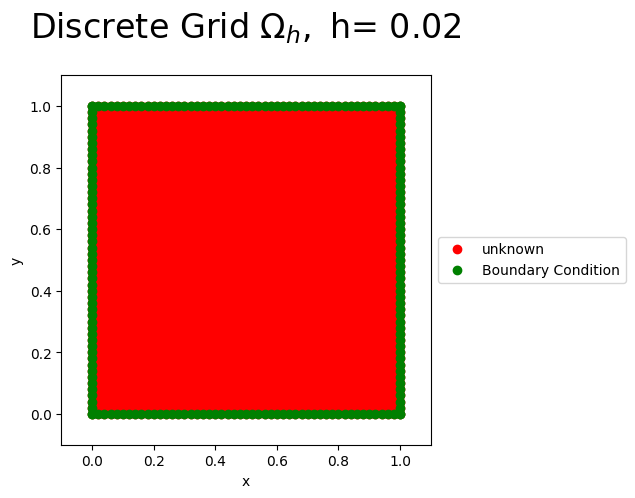

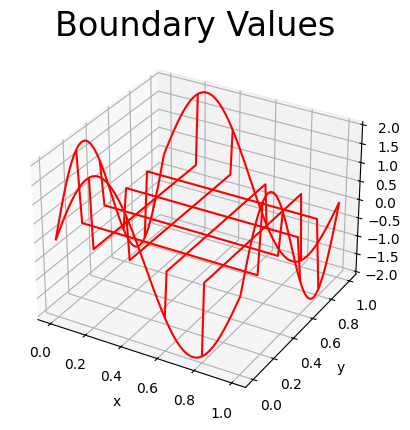

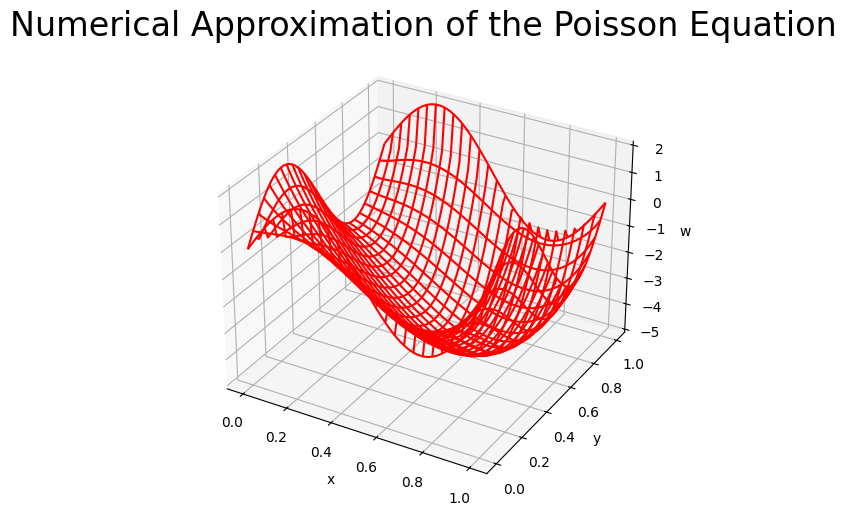

In [14]:
boundary(50)

In [15]:
#Grid:
def grid(a,b,c,d,n,m):
    h=1/n
    k=1/m
    x=np.arange(a,b+h,h)
    y=np.arange(c,d+k,k)
    
    return a,b,c,d,x, y, n, m, h, k


In [16]:
#boundary conditions
def boundary(leftB, rightB, lowerB, upperB, n,m):
    w=np.zeros((n+1,m+1))
    for i in range(0,n):
        w[i,0] = leftB(x[i]) #left boundary
        w[i,n] = rightB(x[i]) #right boundary
    for j in range(0,m):
        w[0,j] =lowerB(y[j]) #lower boundary
        w[m,j] = upperB(y[j]) #upper boundary
    return w

    

In [17]:
def leftB(x):
    return 1100*np.cos(x**3)

def rightB(x):
    return 50*x**2*np.e**x

def lowerB(y):
    return 20*np.sin(y)

def upperB(y):
    return np.e**y

a,b,c,d,x,y,n,m,h,k=grid(1,2,3,4,10,10)
w=boundary(leftB, rightB, lowerB, upperB, n,m)


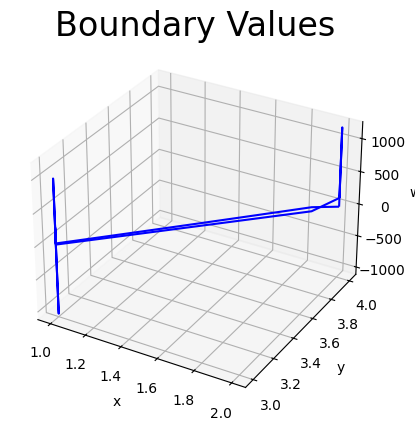

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(x, y, w,color='b', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Boundary Values',fontsize=24,y=1.08)
plt.show()
        

In [19]:
#numerical
def poissonDiff(a,b,c,d,x,y,n,m,w, gax, gbx, gcy, gdy, TOL, N):
    lam=h**2/k**2
    mu = 2*(1+lam)
    l = 1

    while l <= N: #Gauss-Seidel Iterations
        z = (-h**2 * f(x[0],y[m-1]) + gax(y[m-1]) + lam * gcy(x[0]) + lam* w[0,m-2] + w[1,m-1])/mu
        norm = np.abs(z-w[0,m-1])
        w[0,m-1] = z
        for i in range(1,n-3):
            z = (-h**2 * f(x[i],y[m-1]) + lam*gdy(x[i]) + w[i-2,m-1] + w[i,m-1] + lam * w[i-1,m-2])/mu
            if np.abs(w[i-1,m-1] - z) > norm:
                norm = np.abs(w[i-1,m-1] - z)
            w[i-1,m-1] = z
            for j in range(m-1,2): #wtf
                z = (-h**2*f(x[0], y[j]) + gax(y[j]) + lam*(w[0,j+1] + w[0,j-1]) + w[1,j] )/mu
                if np.abs(w[0,j] - z) > norm:
                    norm = np.abs(w[0,j] - z)
                w[0,j] = z
                for i in range(1,n-3):
                    z = (-h**2*f(x[i], y[j]) + w[x-2,j] + lam*w[i-1,j+1]  + w[i,j] + lam*w[i-1,j-1] )/mu
                    if np.abs(w[i,j] - z) > norm:
                        norm = np.abs(w[i,j] - z)
                    w[i,j] = z
                z = (-h**2 * f(x[n-2], y[j]) + gbx(y[j]) + w[n-3,j] + lam*w[n-2,j+1]+lam*w[n-2,j-2])/mu
                if np.abs(w[n-2,j] - z) > norm:
                    norm = np.abs(w[n-2,j]-z)
                w[n-2,j] = z
        z = (-h**2*f(x[0],y[0])+gax(y[0]) + lam*gcy(x[0])+lam*w[0,1]+w[1,0])/mu
        if np.abs(w[0,0] - z) > norm:
            norm = np.abs(w[0,0]-z)
        w[0,0] = z 
        for i in range(1,n-3): #step 15
            z = (-h**2 * f(x[0],y[0]) + lam* gcy(x[i-1])+w[i-2,1]+ lam*w[i-1,2]+w[i,1])/mu
            if np.abs(w[i-1,1]-z) > norm:
                norm = np.abs(w[i-1, 1 ]- z)
            w[i-1,1] = z
        z = (-h**2 * f(x[n-2], y[1])+gbx(y[1])+lam*gcy(x[n-2])+w[n-3,1] + lam * w[n-2,2])/mu
        if np.abs(w[n-2,1]-z) > norm:
            norm = np.abs(w[n-2,1] - z)
        w[n-2,1] = z
        #if norm <= TOL:
      
        l = l+1
    return x,y,w
    #print("max iteration exceeded")



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8, 13) and arg 2 with shape (7, 7).

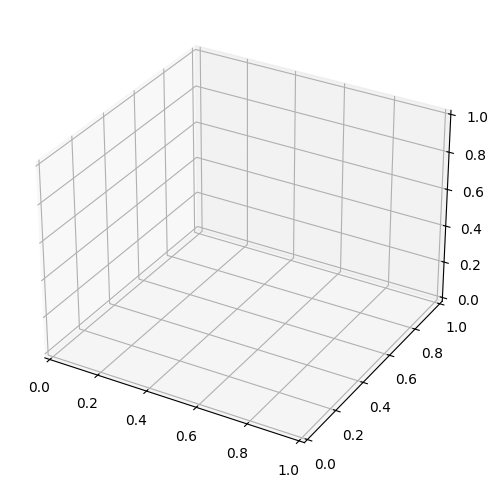

In [20]:
a,b,c,d,x,y,n,m,h,k=grid(0,2,0,1,6,6)

def f(x,y):
    return x*np.e**(y)

def gax(y):
    return np.e*y

def gbx(y):
    return y

def gcy(x):
    return  0

def gdy(x):
    return 2*np.e**x
w=boundary(gax, gbx, gcy, gdy, n,m)
poissonDiff(a,b,c,d,x,y,n,m,w, gax,gbx,gcy,gdy, 0.1, 30)




X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08)
plt.show()

In [ ]:
w

array([[0.27077646, 0.63005889, 0.        , 0.        , 0.        ,
        2.03906662, 0.        ],
       [0.45304697, 0.15751472, 0.        , 0.        , 0.        ,
        1.20224653, 0.16666667],
       [0.90609394, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333],
       [1.35914091, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       ],
       [1.81218789, 0.03619741, 0.        , 0.        , 0.        ,
        0.        , 0.66666667],
       [2.26523486, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.83333333],
       [2.        , 2.36272083, 2.79122485, 3.29744254, 3.89546808,
        4.60195178, 0.        ]])

---
---
New Attempts at Poisson and Laplace

## Steps to solve:
0. Set up residual/ L_2 norm
1. Make a Grid
2. Derive the finite difference formula



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# calculates the norm
def l2_residual(u, rhs, h):
    """Compute the L2 norm of Ax - b for the 5-point Laplacian stencil."""
    r   = (u[:-2,1:-1] + u[2:,1:-1] + u[1:-1,:-2] + u[1:-1,2:] - 4*u[1:-1,1:-1]) / h**2 - rhs
    return np.linalg.norm(r.ravel(), 2)

# --- domain and grid ---
Lx, Ly = 1.0, 1.0
Nx, Ny = 50, 50                # interior points (keep modest for quick tests)
hx, hy = Lx/(Nx+1), Ly/(Ny+1)  # +1 accounts for boundary nodes
assert abs(hx - hy) < 1e-12, "using square cells here → set Nx = Ny"

# --- arrays ---
u  = np.zeros((Ny+2, Nx+2))    # include ghost boundaries
f  = np.zeros_like(u)          # RHS (0 for Laplace)

# --- Dirichlet BCs: hot left wall, cold right wall, insulated top/bottom ---
u[:, 0]  = 1.0                 # x = 0
u[:, -1] = 0.0                 # x = 1
# top and bottom remain 0 → insulated in Laplace sense

In [ ]:
def solve_poisson(u, rhs, h, method="jacobi", w=1.5, max_iter=50_000, tol=1e-8):
    """
    Finite-difference solver for Laplace/Poisson on a rectangular grid.
    method: 'jacobi' | 'gs' | 'sor'
    w: relaxation factor for SOR (ignored otherwise)
    """
    u = u.copy()  # don't mutate the caller's array
    for k in range(max_iter):
        if method == "jacobi":
            u_new = u.copy()
            u_new[1:-1,1:-1] = 0.25*(u[:-2,1:-1] + u[2:,1:-1] +
                                      u[1:-1,:-2] + u[1:-1,2:] -
                                      h**2 * rhs[1:-1,1:-1])
            diff = np.linalg.norm((u_new-u).ravel(), 2)
            u    = u_new

        elif method in ("gs", "sor"):
            diff = 0.0
            for j in range(1, u.shape[0]-1):
                for i in range(1, u.shape[1]-1):
                    old = u[j,i]
                    new = 0.25*(u[j-1,i] + u[j+1,i] + u[j,i-1] + u[j,i+1] -
                                h**2 * rhs[j,i])
                    if method == "sor":
                        new = old + w*(new - old)
                    diff += (new-old)**2
                    u[j,i] = new
            diff = np.sqrt(diff)
        else:
            raise ValueError("unknown method")

        if diff < tol:
            print(f"converged in {k+1} iterations (residual {diff:.2e})")
            break
    else:
        print("⚠️  reached max_iter without meeting tolerance")
    return u

u_laplace = solve_poisson(u, f, hx, method="sor", w=1.8, tol=1e-10)


In [ ]:
fig = plt.figure(figsize=(5,4))
ax  = fig.add_subplot(111, projection="3d")
X, Y = np.meshgrid(np.linspace(0,Lx,Nx+2), np.linspace(0,Ly,Ny+2))
ax.plot_surface(X, Y, u_laplace, rstride=1, cstride=1, linewidth=0, antialiased=True)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("u")
ax.set_title("Laplace solution (hot left → cold right)")
plt.tight_layout(); plt.show()


In [ ]:
# Gaussian source term at centre
sigma = 0.05
xc, yc = 0.5, 0.5
for j,y in enumerate(np.linspace(0,Ly,Ny+2)):
    for i,x in enumerate(np.linspace(0,Lx,Nx+2)):
        f[j,i] = np.exp(-((x-xc)**2 + (y-yc)**2) / (2*sigma**2))

# reset initial guess (zeros except BCs)
u_poiss = np.zeros_like(u)
u_poiss[:, 0]  = 1.0
u_poiss[:, -1] = 0.0

u_poiss = solve_poisson(u_poiss, f, hx, method="sor", w=1.8, tol=1e-10)
